In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
%config InlineBackend.figure_format = 'retina'
import pandas as pd

In [3]:
#Read in the relevant data and print it to the screen
filein = '../Data/150final.csv'
pd.read_csv(filein)

,Time t / s,Voltage U_B1 / V,Voltage U_A1 / V
0,0.00,-0.050,0.005
1,0.02,-0.050,0.005
2,0.04,-0.050,0.005
3,0.06,-0.050,0.005
4,0.08,-0.050,0.005
...,...,...,...
278,5.56,3.675,3.180
279,5.58,3.675,3.180
280,5.60,3.670,3.175
281,5.62,3.670,3.180


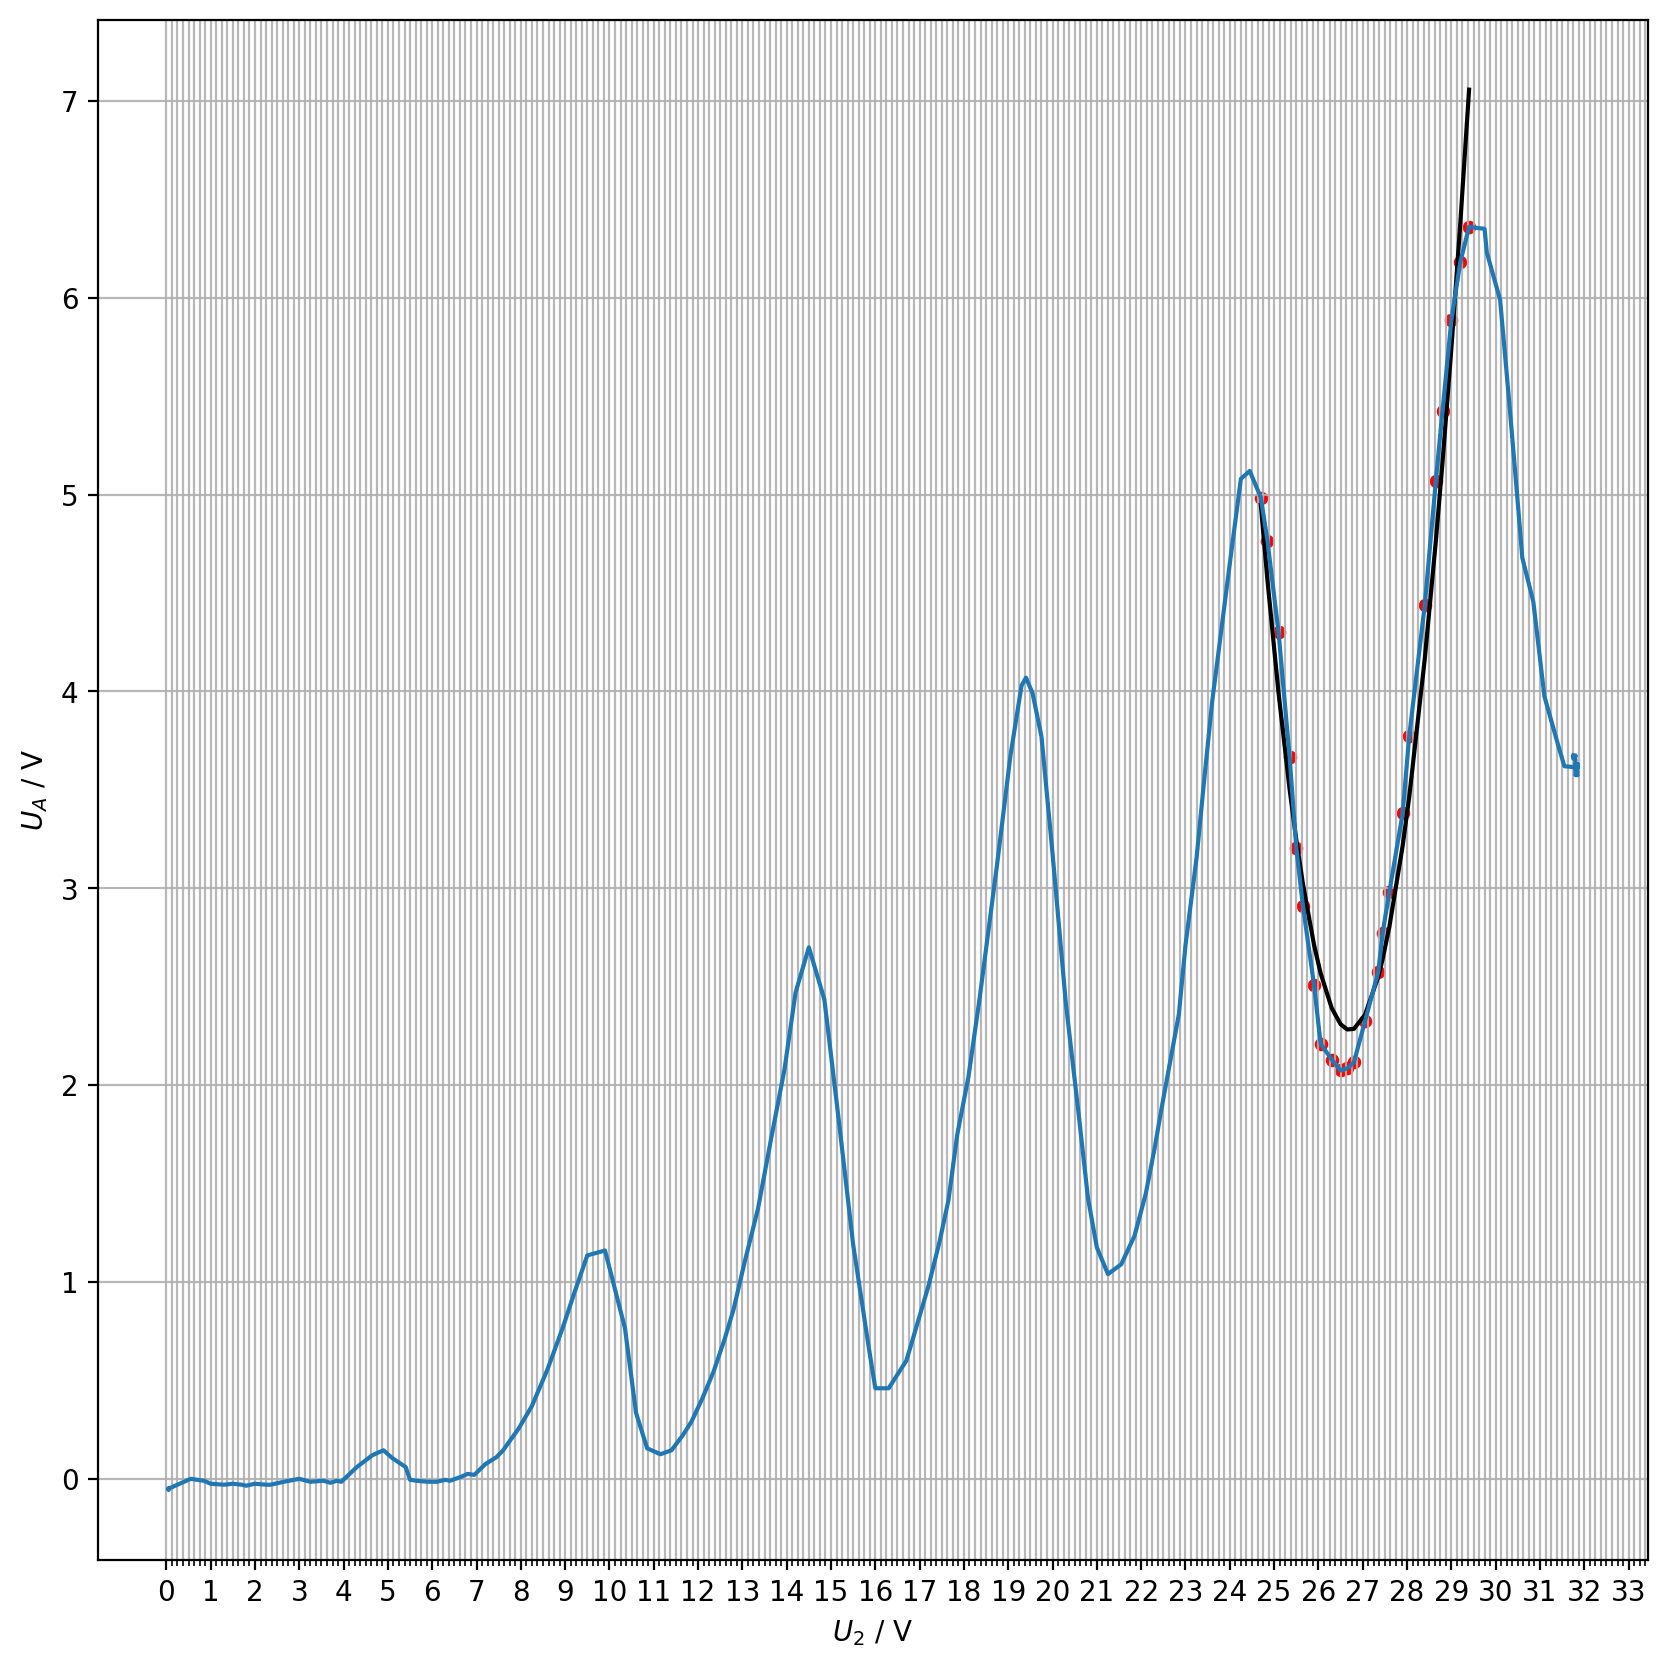

In [16]:
plt.rcParams['font.size'] = 15
#Allocate the U2/10 Values to an array x
x = pd.read_csv(filein,
                usecols=[2],
               names = ['A1']) 

#Allocate the UA values to an array y
y = pd.read_csv(filein,
                usecols=[1],
                names = ['B1'])

#These lines split the data and convert it all to numeric values for plotting
y = y.iloc[1: , :]
x = x.iloc[1: , :]
ser = pd.Series(x['A1'])
x = pd.to_numeric(ser)

ser = pd.Series(y['B1'])
y = pd.to_numeric(ser)

#Putting the data back together
data = pd.concat([x, y], axis = 1)

#Multiplies all U2 values by 10 as they are recorded as U2/10 in Cassy Lab
data.A1 = data.A1.mul(10)

#plt.scatter(data.A1, data.B1)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)

#Selects the data points of the trough for polyfitting
newdata = data.iloc[125:149, : ]

#Plots the trough selected above
plt.scatter(newdata.A1, newdata.B1, s = 15, c = 'red')

#Creates a quadratic fit to the trough data points
p = [1, 2, 3]
p = np.polyfit(newdata.A1, newdata.B1, 2)
ypoly = poly(p[0], p[1], p[2], newdata.A1)

major_ticks = np.arange(0, 101, 1)
minor_ticks = np.arange(0, 101, 0.125)
ax.set_xticks(minor_ticks, minor=True)
ax.set_xticks(major_ticks)

#Plots the quadratic fit
ax.plot(newdata.A1, ypoly, c = 'black')
ax.grid(which = 'minor', alpha = 0.9)
ax.grid(which = 'major', alpha = 0.9)

ax.set_xlabel('$U_2$ / V')
ax.set_ylabel('$U_A$ / V')
plt.plot(data.A1, data.B1)

In [5]:
xmax = np.zeros(int(data.size/2) + 1)
ymax = np.zeros(int(data.size/2) + 1)

In [6]:
#A function that finds the minimum points in the data and allocates them to the array ymax before printing them
def max(y):
    for i in range(2, int(data.size/2)):
        if y[i]>y[i+1] and y[i]>y[i-1]:
            ymax[i] = y[i]
            print(i)

In [7]:
#See above function. These values are then used to select the data points of the trough as seen above
max(y)

29
33
36
40
42
44
48
55
58
69
86
104
125
149
187
199
232
245
263


In [8]:
#Defines the form for a quadratic function
def poly(a, b, c, x):
    return a*(x**2) + b*x + c

In [9]:
#Finds the minimum point of the quadratic fit to the selected trough using basic algebra
mi = -p[1]/(2*p[0])
print(mi)
print(poly(p[0],p[1],p[2],mi))

26.710057068369814
2.2803251964198807


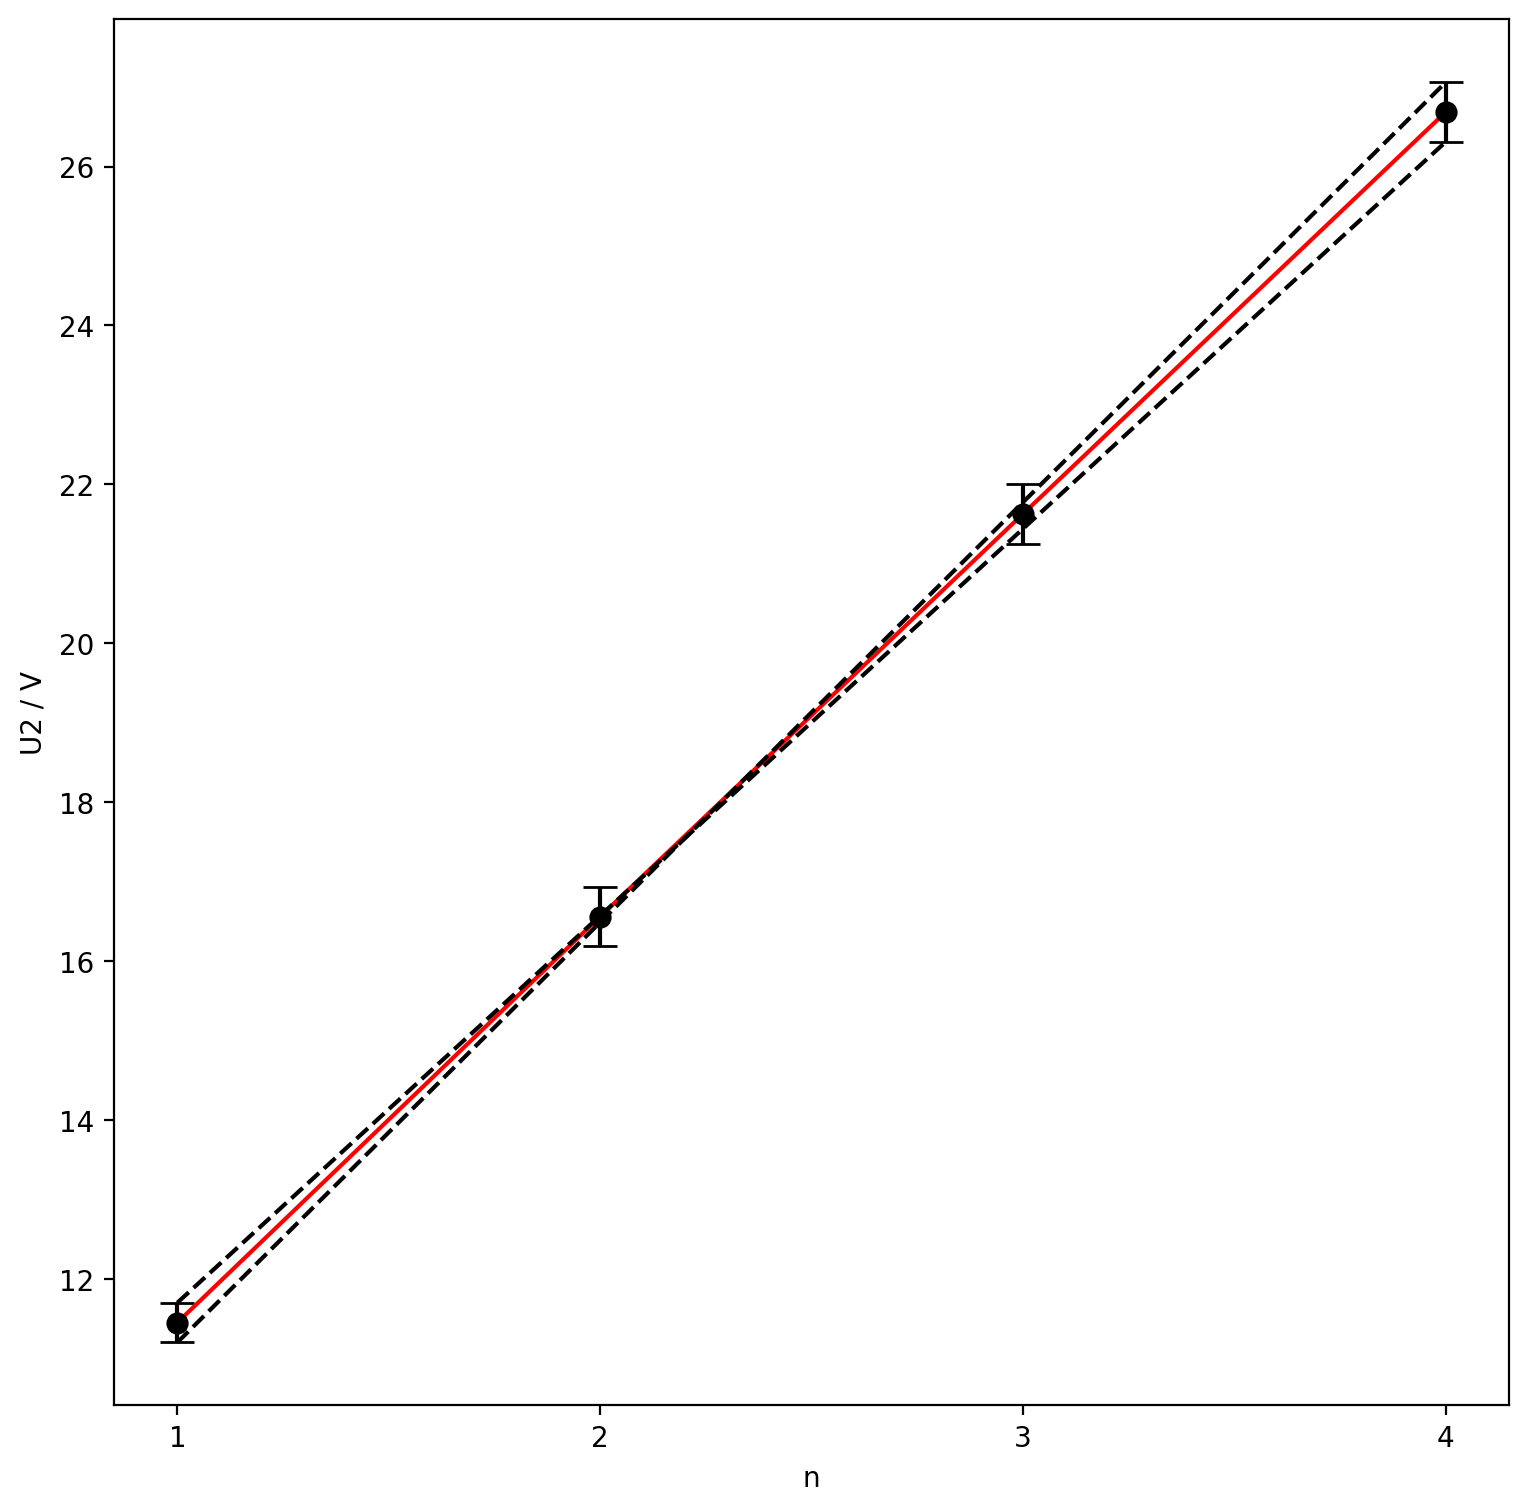

In [10]:
#Plots the minimum U2 values against their order, n 
temp = '150'
n = [1,2,3,4]
utwo = pd.read_csv('../Data/u2values.csv')
u = utwo[temp].dropna()
uncertainties = pd.read_csv('../Data/uncertainties.csv')
uncer = uncertainties[temp].dropna()

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1,1,1)
ax.errorbar(n,           
             u,              
             yerr=uncer,     
             marker='o',             
             markersize = 7,
             markerfacecolor = 'black',
             color='black',          
             linestyle='none',       
             capsize=6,              
             )

ax.set_ylabel('U2 / V')
ax.set_xlabel('n')

ax.plot(n, u, c='red')

#Gives the coordinates for the worst fit lines
wf2 = [u[0] + uncer[0], u[3] - uncer[3]]
wf1 = [u[0] - uncer[0], u[3] + uncer[3]]

ax.plot([1, 4], wf1, c='black', linestyle = '--')
ax.plot([1, 4], wf2, c='black', linestyle = '--')

ax.set_xticks([1, 2, 3, 4])


plt.show()

#Defines a linear function
def line(x, slope, intercept):          # Set up the linear fitting - don't ammend
    return slope*x + intercept 

#Calculate the slope and intercept along with their respective errors
popt, pcov = curve_fit(line,n,u)
slope = popt[0]
intercept = popt[1]
err_slope = np.sqrt(float(pcov[0][0]))
err_intercept = np.sqrt(float(pcov[1][1]))

In [17]:
slope

5.07524172093715

In [19]:
wf1slope = (wf1[1] - wf1[0])/3
wf2slope = (wf2[1] - wf2[0])/3
print((wf1[1] - wf1[0])/3)
print((wf2[1] - wf2[0])/3)
print((wf1slope - wf2slope)/2)

5.284646190253371
4.867979523586704
0.20833333333333348
